# 回帰

自動的に入力と出力データの関係性を求めましょう

## 直観に分かる例

数学関数を使い、データを生成

In [1]:
import math
import numpy as np

# 数値を作る関数
def gen_function(x):
    y = math.sin(x)
    return y

# 信号を生成
def generate_signal():
    
    # x と yの出力
    data_x = []
    data_y = []
       
    # x軸のサンプリング
    for x in np.arange(-6, 6, 0.05):
        
        y = gen_function(x)
        
        data_y.append(y)
        data_x.append(x)
        
    return  np.array(data_x), np.array(data_y)

In [2]:
data_x, data_y = generate_signal()

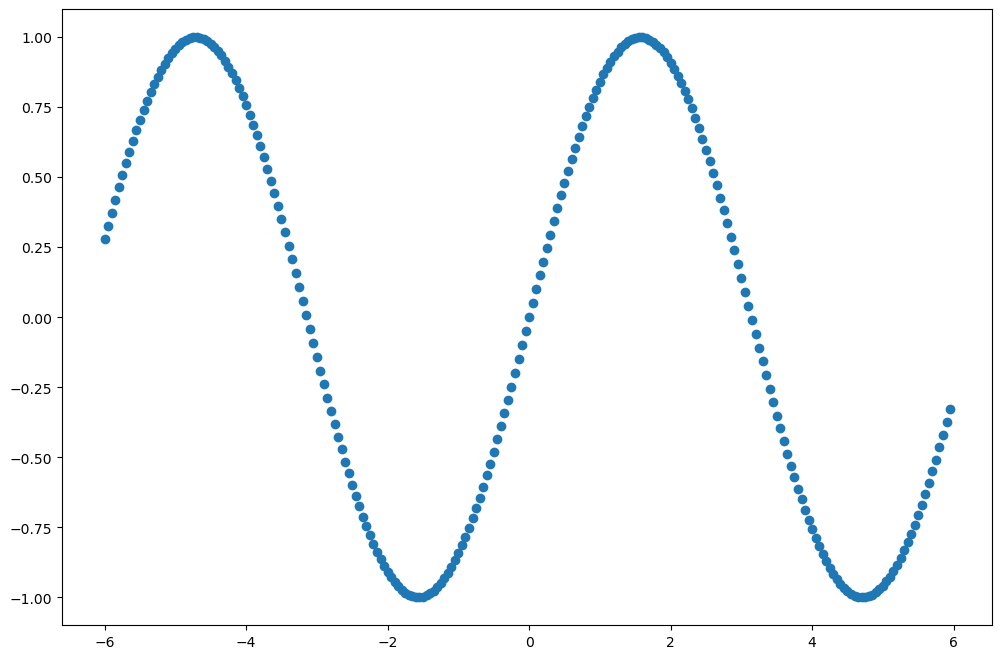

In [3]:
import matplotlib.pyplot as plt

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

### ノイズ追加
大変きれいなsin関数ですが、実際に信号はそんなにきれいではないので、少しノイズを加えてみましょう

In [4]:
# 数値を作る関数
def gen_function(x):
    y = math.sin(x)
    y += np.random.normal(-0.2, 0.2)  # 少しノイズを加える
    return y

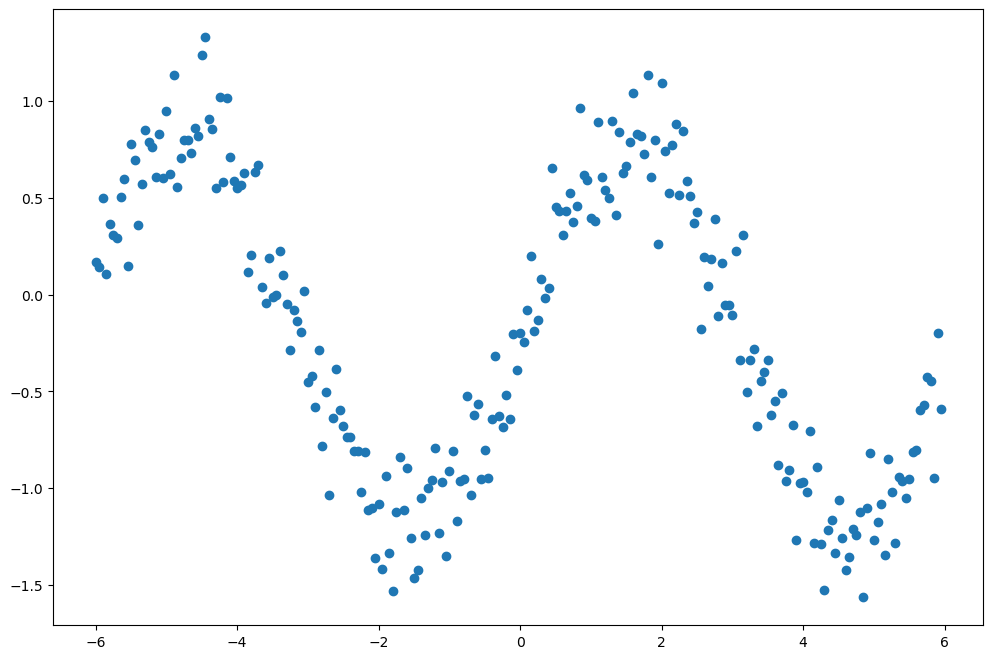

In [5]:
data_x, data_y = generate_signal()

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

### データ損失
たまに、うまくデータ取れない場合もあるので、さらに、信号から一部のデータを抜けてみましょう

In [6]:
# 信号を生成
def generate_signal(skip=(-6, -6)):
    
    # x と yの出力
    data_x = []
    data_y = []
       
    # x軸のサンプリング
    for x in np.arange(-6, 6, 0.05):
    
        # ランダムにデータが失う
        if x > skip[0] and x < skip[1]:
            continue
        
        y = gen_function(x)
        
        data_y.append(y)
        data_x.append(x)
        
    return  np.array(data_x), np.array(data_y)

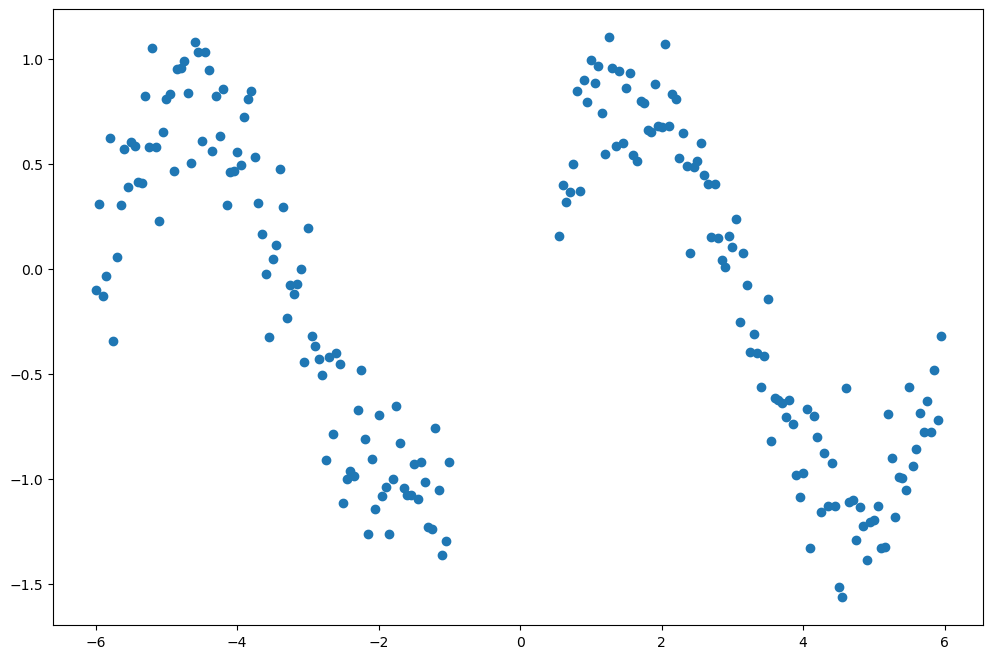

In [7]:
data_x, data_y = generate_signal((-1.0, 0.5))

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

これで、回帰できるのか確認してみましょう

## モデル構築

In [8]:
from keras.layers import Input, Dense
from keras.models import Model

def create_model():
    
    lyr_input = Input(shape=(1,))
    lyr_hiddn = Dense(units=8, activation="tanh")(lyr_input)
    lyr_hiddn = Dense(units=16, activation="tanh")(lyr_hiddn)
    lyr_hiddn = Dense(units=8, activation="tanh")(lyr_hiddn)
    lyr_outpt = Dense(units=1, activation="tanh")(lyr_hiddn)
    
    model = Model(inputs=lyr_input, outputs=lyr_outpt)
    return model

model = create_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [9]:
#回帰の場合は誤差を減らしたいため、mseはOK
model.compile(optimizer="adam", loss="mse")

## 前処理と学習

In [10]:
# 前処理として、最大値と最小値の間に正規化だけです
min_y = min(data_y)
max_y = max(data_y)
prep_y = (data_y - min_y) / (max_y - min_y)

In [11]:
model.fit(data_x, prep_y, batch_size=100, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 0s/step - loss: 0.9386
Epoch 2/1000
3/3 [==============================] - 0s 664us/step - loss: 0.7978
Epoch 3/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6332
Epoch 4/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4658
Epoch 5/1000
3/3 [==============================] - 0s 664us/step - loss: 0.3330
Epoch 6/1000
3/3 [==============================] - 0s 0s/step - loss: 0.2462
Epoch 7/1000
3/3 [==============================] - 0s 0s/step - loss: 0.2215
Epoch 8/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.2170
Epoch 9/1000
3/3 [==============================] - 0s 0s/step - loss: 0.2097
Epoch 10/1000
3/3 [==============================] - 0s 0s/step - loss: 0.1875
Epoch 11/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 12/1000
3/3 [==============================] - 0s 604us/step - loss: 0.1337
Epoch 13/1000
3/3 [==============================

3/3 [==============================] - 0s 0s/step - loss: 0.0164
Epoch 104/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0163
Epoch 105/1000
3/3 [==============================] - 0s 976us/step - loss: 0.0162
Epoch 106/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0161
Epoch 107/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 108/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0160
Epoch 109/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0160
Epoch 110/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 111/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0159
Epoch 112/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0159
Epoch 113/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.0158
Epoch 114/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0158
Epoch 115/1000
3/3 [============================

3/3 [==============================] - 0s 0s/step - loss: 0.0151
Epoch 205/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0149
Epoch 206/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0149
Epoch 207/1000
3/3 [==============================] - 0s 459us/step - loss: 0.0149
Epoch 208/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0150
Epoch 209/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 210/1000
3/3 [==============================] - 0s 441us/step - loss: 0.0149
Epoch 211/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0149
Epoch 212/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0150
Epoch 213/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.0149
Epoch 214/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0149
Epoch 215/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0152
Epoch 216/1000
3/3 [==========================

3/3 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 306/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0145
Epoch 307/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0145
Epoch 308/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 309/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0149
Epoch 310/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0148
Epoch 311/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 312/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0148
Epoch 313/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0144
Epoch 314/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 315/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0160
Epoch 316/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0150
Epoch 317/1000
3/3 [==============================]

3/3 [==============================] - 0s 0s/step - loss: 0.0142
Epoch 407/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0141
Epoch 408/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 409/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0141
Epoch 410/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 411/1000
3/3 [==============================] - 0s 664us/step - loss: 0.0146
Epoch 412/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0142
Epoch 413/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0143
Epoch 414/1000
3/3 [==============================] - 0s 998us/step - loss: 0.0141
Epoch 415/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0143
Epoch 416/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0143
Epoch 417/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0141
Epoch 418/1000
3/3 [=======================

3/3 [==============================] - 0s 0s/step - loss: 0.0140
Epoch 508/1000
3/3 [==============================] - 0s 695us/step - loss: 0.0141
Epoch 509/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0140
Epoch 510/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0142
Epoch 511/1000
3/3 [==============================] - 0s 751us/step - loss: 0.0140
Epoch 512/1000
3/3 [==============================] - 0s 476us/step - loss: 0.0144
Epoch 513/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 514/1000
3/3 [==============================] - 0s 688us/step - loss: 0.0141
Epoch 515/1000
3/3 [==============================] - 0s 836us/step - loss: 0.0142
Epoch 516/1000
3/3 [==============================] - 0s 776us/step - loss: 0.0140
Epoch 517/1000
3/3 [==============================] - 0s 998us/step - loss: 0.0141
Epoch 518/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 519/1000
3/3 [============

3/3 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 609/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0144
Epoch 610/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 611/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 612/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0145
Epoch 613/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 614/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0144
Epoch 615/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0140
Epoch 616/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 617/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 618/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0139
Epoch 619/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.0143
Epoch 620/1000
3/3 [============================

3/3 [==============================] - 0s 4ms/step - loss: 0.0137
Epoch 710/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 711/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 712/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 713/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0136
Epoch 714/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.0141
Epoch 715/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.0138
Epoch 716/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0136
Epoch 717/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.0138
Epoch 718/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.0138
Epoch 719/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.0138
Epoch 720/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.0137
Epoch 721/1000
3/3 [========================

3/3 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 811/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 812/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0138
Epoch 813/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 814/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 815/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 816/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.0136
Epoch 817/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.0136
Epoch 818/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.0139
Epoch 819/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.0141
Epoch 820/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 821/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 822/1000
3/3 [========================

3/3 [==============================] - 0s 0s/step - loss: 0.0138
Epoch 912/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 913/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 914/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 915/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 916/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 917/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0135
Epoch 918/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.0135
Epoch 919/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0137
Epoch 920/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0136
Epoch 921/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0135
Epoch 922/1000
3/3 [==============================] - 0s 328us/step - loss: 0.0137
Epoch 923/1000
3/3 [=========================

In [12]:
#データ抜けなしで推論
full_x, _ = generate_signal()
pred_y = model.predict(full_x)

In [13]:
# 正規化した数値を元に戻す（後処理）
pred_y = (pred_y * (max_y - min_y)) + min_y

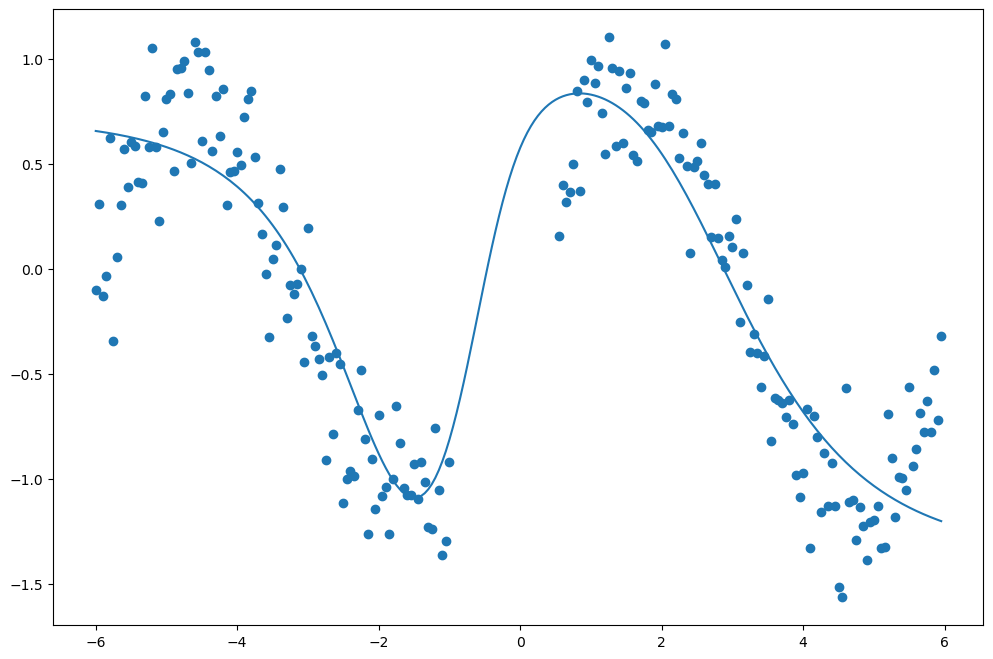

In [14]:
#可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)
plt.plot(full_x, pred_y)

## 他の関数はどう？

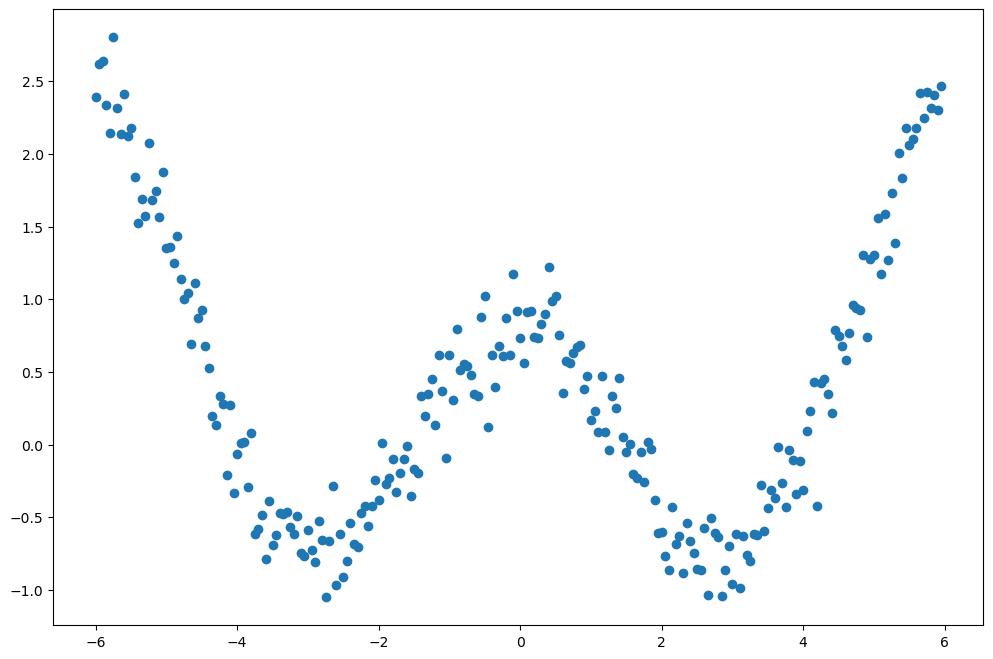

In [15]:
# 数値を作る関数
def gen_function(x):
    y = math.cos(x) + 0.05 * (x * x)
    y += np.random.normal(-0.2, 0.2)  # 少しノイズを加える
    return y

data_x, data_y = generate_signal()

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

In [16]:
model = create_model()
model.compile(optimizer="adam", loss="mse")

In [17]:
# y軸を「最大値」と「最小値」の間に正規化
min_y = min(data_y)
max_y = max(data_y)
prep_y = (data_y - min_y) / (max_y - min_y)

model.fit(data_x, prep_y, batch_size=100, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 997us/step - loss: 0.2035
Epoch 2/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1747
Epoch 3/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1608
Epoch 4/1000
3/3 [==============================] - 0s 997us/step - loss: 0.1462
Epoch 5/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1295
Epoch 6/1000
3/3 [==============================] - 0s 997us/step - loss: 0.1152
Epoch 7/1000
3/3 [==============================] - 0s 999us/step - loss: 0.1052
Epoch 8/1000
3/3 [==============================] - 0s 502us/step - loss: 0.0959
Epoch 9/1000
3/3 [==============================] - 0s 649us/step - loss: 0.0872
Epoch 10/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0807
Epoch 11/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0755
Epoch 12/1000
3/3 [==============================] - 0s 663us/step - loss: 0.0715
Epoch 13/1000
3/3 [================

3/3 [==============================] - 0s 741us/step - loss: 0.0571
Epoch 102/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0570
Epoch 103/1000
3/3 [==============================] - 0s 762us/step - loss: 0.0569
Epoch 104/1000
3/3 [==============================] - 0s 695us/step - loss: 0.0570
Epoch 105/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 106/1000
3/3 [==============================] - 0s 855us/step - loss: 0.0566
Epoch 107/1000
3/3 [==============================] - 0s 858us/step - loss: 0.0571
Epoch 108/1000
3/3 [==============================] - 0s 842us/step - loss: 0.0567
Epoch 109/1000
3/3 [==============================] - 0s 715us/step - loss: 0.0564
Epoch 110/1000
3/3 [==============================] - 0s 437us/step - loss: 0.0568
Epoch 111/1000
3/3 [==============================] - 0s 714us/step - loss: 0.0565
Epoch 112/1000
3/3 [==============================] - 0s 708us/step - loss: 0.0559
Epoch 113/1000
3/3 [===

3/3 [==============================] - 0s 719us/step - loss: 0.0302
Epoch 201/1000
3/3 [==============================] - 0s 484us/step - loss: 0.0296
Epoch 202/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0296
Epoch 203/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0289
Epoch 204/1000
3/3 [==============================] - 0s 895us/step - loss: 0.0287
Epoch 205/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0283
Epoch 206/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0284
Epoch 207/1000
3/3 [==============================] - 0s 715us/step - loss: 0.0277
Epoch 208/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0271
Epoch 209/1000
3/3 [==============================] - 0s 991us/step - loss: 0.0267
Epoch 210/1000
3/3 [==============================] - 0s 996us/step - loss: 0.0264
Epoch 211/1000
3/3 [==============================] - 0s 972us/step - loss: 0.0260
Epoch 212/1000
3/3 [=========

3/3 [==============================] - 0s 679us/step - loss: 0.0108
Epoch 300/1000
3/3 [==============================] - 0s 996us/step - loss: 0.0109
Epoch 301/1000
3/3 [==============================] - 0s 997us/step - loss: 0.0106
Epoch 302/1000
3/3 [==============================] - 0s 664us/step - loss: 0.0106
Epoch 303/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 304/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 305/1000
3/3 [==============================] - 0s 678us/step - loss: 0.0105
Epoch 306/1000
3/3 [==============================] - 0s 996us/step - loss: 0.0103
Epoch 307/1000
3/3 [==============================] - 0s 678us/step - loss: 0.0103
Epoch 308/1000
3/3 [==============================] - 0s 653us/step - loss: 0.0103
Epoch 309/1000
3/3 [==============================] - 0s 997us/step - loss: 0.0102
Epoch 310/1000
3/3 [==============================] - 0s 997us/step - loss: 0.0102
Epoch 311/1000
3/3 [===

3/3 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 399/1000
3/3 [==============================] - 0s 391us/step - loss: 0.0067
Epoch 400/1000
3/3 [==============================] - 0s 760us/step - loss: 0.0067
Epoch 401/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 402/1000
3/3 [==============================] - 0s 826us/step - loss: 0.0067
Epoch 403/1000
3/3 [==============================] - 0s 693us/step - loss: 0.0065
Epoch 404/1000
3/3 [==============================] - 0s 951us/step - loss: 0.0065
Epoch 405/1000
3/3 [==============================] - 0s 691us/step - loss: 0.0066
Epoch 406/1000
3/3 [==============================] - 0s 945us/step - loss: 0.0064
Epoch 407/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 408/1000
3/3 [==============================] - 0s 674us/step - loss: 0.0064
Epoch 409/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 410/1000
3/3 [=======

3/3 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 499/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 500/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 501/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 502/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 503/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 504/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 505/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 506/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 507/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 508/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 509/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 510/1000
3/3 [=======================

3/3 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 600/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 601/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 602/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 603/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 604/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 605/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 606/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 607/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 608/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 609/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 610/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 611/1000
3/3 [=======================

3/3 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 701/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 702/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 703/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 704/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 705/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 706/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 707/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 708/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 709/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 710/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 711/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 712/1000
3/3 [=======================

3/3 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 802/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 803/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 804/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 805/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 806/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 807/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 808/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 809/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 810/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 811/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 812/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 813/1000
3/3 [=======================

3/3 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 903/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 904/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 905/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 906/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 907/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 908/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 909/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 910/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 911/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 912/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 913/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 914/1000
3/3 [=======================

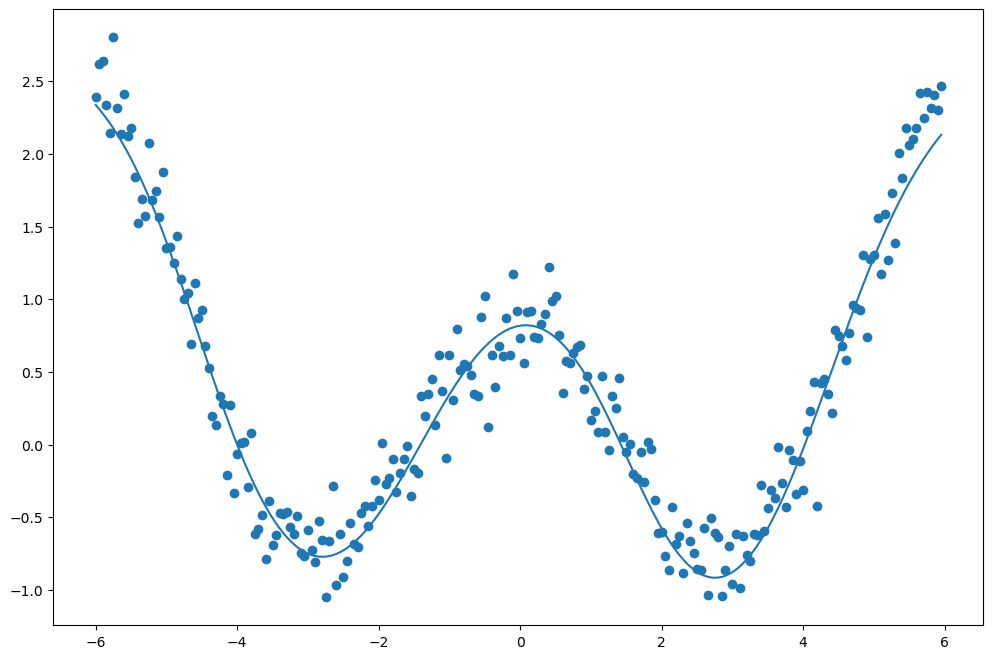

In [18]:
#推論
pred_y = model.predict(data_x)

# 正規化した数値を元に戻す
pred_y = (pred_y * (max_y - min_y)) + min_y

#可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)
plt.plot(data_x, pred_y)

### 一部を抜けると？

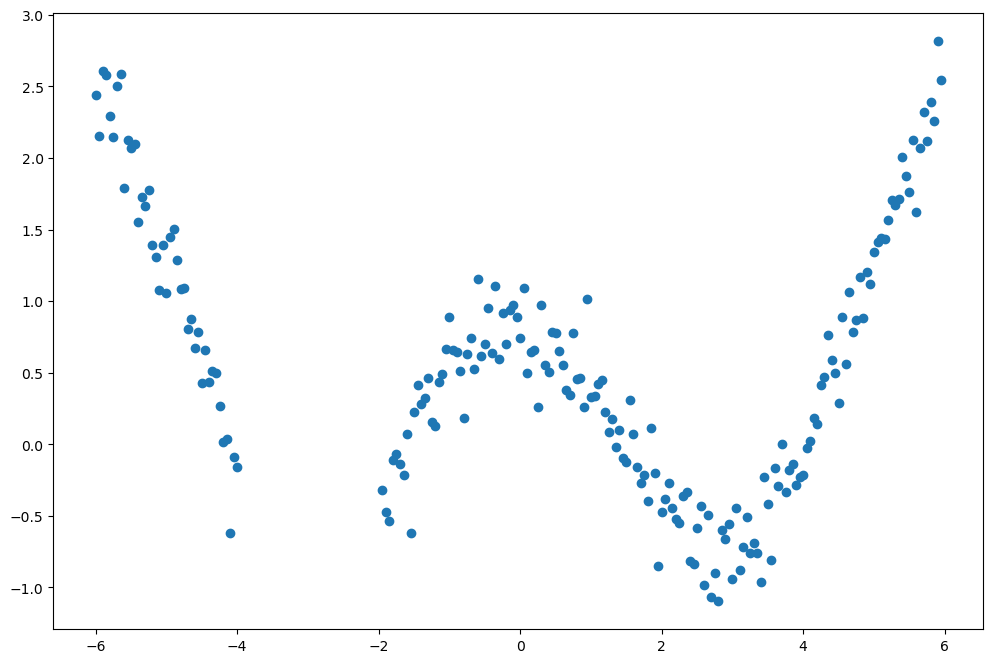

In [19]:
data_x, data_y = generate_signal((-4, -2))

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

In [20]:
model = create_model()
model.compile(optimizer="adam", loss="mse")

In [21]:
# y軸を「最大値」と「最小値」の間に正規化
min_y = min(data_y)
max_y = max(data_y)
prep_y = (data_y - min_y) / (max_y - min_y)

model.fit(data_x, prep_y, batch_size=100, epochs=1000)

Epoch 1/1000
2/2 [==============================] - 0s 589us/step - loss: 0.2433
Epoch 2/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2263
Epoch 3/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2136
Epoch 4/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2031
Epoch 5/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1908
Epoch 6/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1799
Epoch 7/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1705
Epoch 8/1000
2/2 [==============================] - 0s 598us/step - loss: 0.1607
Epoch 9/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1519
Epoch 10/1000
2/2 [==============================] - 0s 507us/step - loss: 0.1429
Epoch 11/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1348
Epoch 12/1000
2/2 [==============================] - 0s 673us/step - loss: 0.1272
Epoch 13/1000
2/2 [======================

2/2 [==============================] - 0s 1ms/step - loss: 0.0410
Epoch 103/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0409
Epoch 104/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0408
Epoch 105/1000
2/2 [==============================] - 0s 541us/step - loss: 0.0407
Epoch 106/1000
2/2 [==============================] - 0s 727us/step - loss: 0.0405
Epoch 107/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0403
Epoch 108/1000
2/2 [==============================] - 0s 502us/step - loss: 0.0402
Epoch 109/1000
2/2 [==============================] - 0s 527us/step - loss: 0.0403
Epoch 110/1000
2/2 [==============================] - 0s 998us/step - loss: 0.0399
Epoch 111/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 112/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0397
Epoch 113/1000
2/2 [==============================] - 0s 501us/step - loss: 0.0396
Epoch 114/1000
2/2 [===========

2/2 [==============================] - 0s 1ms/step - loss: 0.0273
Epoch 202/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0271
Epoch 203/1000
2/2 [==============================] - 0s 660us/step - loss: 0.0270
Epoch 204/1000
2/2 [==============================] - 0s 545us/step - loss: 0.0269
Epoch 205/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 206/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0265
Epoch 207/1000
2/2 [==============================] - 0s 562us/step - loss: 0.0264
Epoch 208/1000
2/2 [==============================] - 0s 509us/step - loss: 0.0264
Epoch 209/1000
2/2 [==============================] - 0s 594us/step - loss: 0.0262
Epoch 210/1000
2/2 [==============================] - 0s 587us/step - loss: 0.0261
Epoch 211/1000
2/2 [==============================] - 0s 502us/step - loss: 0.0259
Epoch 212/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0258
Epoch 213/1000
2/2 [=========

2/2 [==============================] - 0s 979us/step - loss: 0.0172
Epoch 301/1000
2/2 [==============================] - 0s 995us/step - loss: 0.0171
Epoch 302/1000
2/2 [==============================] - 0s 510us/step - loss: 0.0170
Epoch 303/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 304/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 305/1000
2/2 [==============================] - 0s 998us/step - loss: 0.0168
Epoch 306/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0168
Epoch 307/1000
2/2 [==============================] - 0s 995us/step - loss: 0.0167
Epoch 308/1000
2/2 [==============================] - 0s 497us/step - loss: 0.0167
Epoch 309/1000
2/2 [==============================] - 0s 977us/step - loss: 0.0166
Epoch 310/1000
2/2 [==============================] - 0s 994us/step - loss: 0.0165
Epoch 311/1000
2/2 [==============================] - 0s 966us/step - loss: 0.0166
Epoch 312/1000
2/2 [=====

2/2 [==============================] - 0s 579us/step - loss: 0.0122
Epoch 400/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 401/1000
2/2 [==============================] - 0s 554us/step - loss: 0.0121
Epoch 402/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 403/1000
2/2 [==============================] - 0s 596us/step - loss: 0.0121
Epoch 404/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 405/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 406/1000
2/2 [==============================] - 0s 600us/step - loss: 0.0120
Epoch 407/1000
2/2 [==============================] - 0s 550us/step - loss: 0.0119
Epoch 408/1000
2/2 [==============================] - 0s 549us/step - loss: 0.0119
Epoch 409/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 410/1000
2/2 [==============================] - 0s 624us/step - loss: 0.0118
Epoch 411/1000
2/2 [=========

2/2 [==============================] - 0s 583us/step - loss: 0.0090
Epoch 499/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 500/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 501/1000
2/2 [==============================] - 0s 630us/step - loss: 0.0089
Epoch 502/1000
2/2 [==============================] - 0s 636us/step - loss: 0.0089
Epoch 503/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 504/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 505/1000
2/2 [==============================] - 0s 634us/step - loss: 0.0088
Epoch 506/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 507/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 508/1000
2/2 [==============================] - 0s 597us/step - loss: 0.0087
Epoch 509/1000
2/2 [==============================] - 0s 684us/step - loss: 0.0086
Epoch 510/1000
2/2 [===========

2/2 [==============================] - 0s 641us/step - loss: 0.0064
Epoch 598/1000
2/2 [==============================] - 0s 499us/step - loss: 0.0063
Epoch 599/1000
2/2 [==============================] - 0s 608us/step - loss: 0.0064
Epoch 600/1000
2/2 [==============================] - 0s 551us/step - loss: 0.0063
Epoch 601/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 602/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 603/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 604/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 605/1000
2/2 [==============================] - 0s 578us/step - loss: 0.0062
Epoch 606/1000
2/2 [==============================] - 0s 564us/step - loss: 0.0062
Epoch 607/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 608/1000
2/2 [==============================] - 0s 555us/step - loss: 0.0062
Epoch 609/1000
2/2 [=========

2/2 [==============================] - 0s 531us/step - loss: 0.0046
Epoch 697/1000
2/2 [==============================] - 0s 515us/step - loss: 0.0046
Epoch 698/1000
2/2 [==============================] - 0s 996us/step - loss: 0.0046
Epoch 699/1000
2/2 [==============================] - 0s 517us/step - loss: 0.0046
Epoch 700/1000
2/2 [==============================] - 0s 990us/step - loss: 0.0046
Epoch 701/1000
2/2 [==============================] - 0s 514us/step - loss: 0.0046
Epoch 702/1000
2/2 [==============================] - 0s 998us/step - loss: 0.0046
Epoch 703/1000
2/2 [==============================] - 0s 515us/step - loss: 0.0045
Epoch 704/1000
2/2 [==============================] - 0s 498us/step - loss: 0.0046
Epoch 705/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0045
Epoch 706/1000
2/2 [==============================] - 0s 996us/step - loss: 0.0046
Epoch 707/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0045
Epoch 708/1000
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 796/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 797/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 798/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 799/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0038
Epoch 800/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 801/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 802/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 803/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 804/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 805/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 806/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 807/1000
2/2 [=====================

2/2 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 897/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 898/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 899/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 900/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 901/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 902/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 903/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 904/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 905/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 906/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 907/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 908/1000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 998/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 999/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 1000/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0032


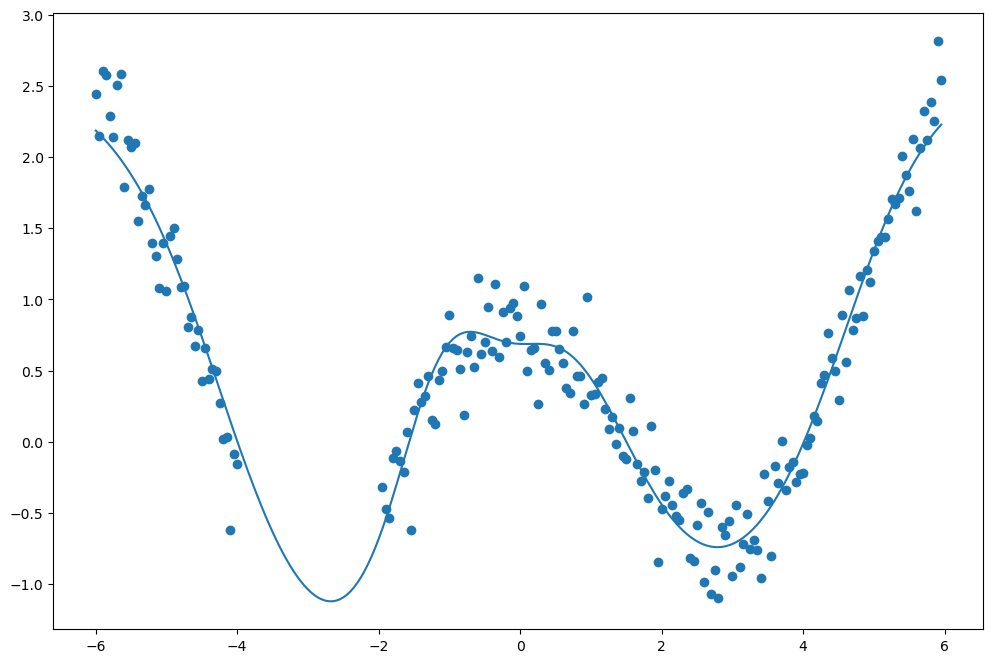

In [22]:
#データ抜けなしで推論
full_x, _ = generate_signal()
pred_y = model.predict(full_x)

# 正規化した数値を元に戻す
pred_y = (pred_y * (max_y - min_y)) + min_y

#可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)
plt.plot(full_x, pred_y)